# Case Study Part 1 : <br> Exploratory Data Analysis (EDA) of Network Data Plane Traffic 

##### This notebook is to be run after running PCAP_Network_Traffic-Data_Extraction.ipynb which takes a pcap file, extracts packets data using Scapy ( a python tool for packet analysis ) and saves the data in a csv file, which would be used as input file for our analysis here.

The packet data analysed here is taken from 
https://www.netresec.com/?page=MACCDC   
File : maccdc2012_00000.pcap.gz 



#### 1. Basic / High Level Traffic Analysis
#### 2. Hosts Analysis
#### 3. Analysis of Common Network Services
#### 4. Clustering Of Hosts based on Ports usage (using K-Means Clustering technique)



##### Load libraries

In [1]:
import datetime
import pandas as pd

import MyTrafficAnalyzer as myan

In [2]:
import matplotlib as plt
import matplotlib.pyplot as pyplot
from pandas import Grouper

##### Read the csv file containing packet data

In [3]:


## The date column gets read as an object data type using the default read_csv().
## To read the date column correctly, we can use the argument parse_dates to specify a list of date columns.


df_file = "pcaps.csv"

df = pd.read_csv(df_file, parse_dates=["timestamp"], \
                 dtype=object, index_col=["timestamp"])

print(sorted(df.columns))
print(df.shape)

['Unnamed: 0', 'arpdst', 'arpop', 'arppdst', 'arppsrc', 'arpsrc', 'bootpchaddr', 'bootpciaddr', 'bootpgiaddr', 'bootpop', 'bootpsiaddr', 'bootpyiaddr', 'dhcpoptions', 'dnsopcode', 'edst', 'esrc', 'etype', 'icmpcode', 'icmptype', 'id', 'idst', 'iperrordst', 'iperrorproto', 'iperrorsrc', 'iplen', 'iproto', 'ipttl', 'isrc', 'len', 'ntpmode', 'tdport', 'tsport', 'twindow', 'uerrordst', 'uerrorsrc', 'ulen', 'utdport', 'utsport', 'vlan']
(5998837, 39)


In [5]:
df.head()

,Unnamed: 0,id,len,esrc,edst,etype,vlan,isrc,idst,iproto,...,bootpgiaddr,bootpchaddr,dhcpoptions,ntpmode,arpop,arpsrc,arpdst,arppsrc,arppdst,dnsopcode
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-03-16 18:00:00,0,0,117,00:16:47:9d:f2:c2,00:0c:29:41:4b:e7,33024,120,192.168.229.254,192.168.202.79,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-16 18:00:00,1,1,269,00:0c:29:41:4b:e7,00:16:47:9d:f2:c2,33024,120,192.168.202.79,192.168.229.254,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-16 18:00:00,2,2,70,00:0c:29:41:4b:e7,00:16:47:9d:f2:c2,33024,120,192.168.202.79,192.168.229.251,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-16 18:00:00,3,3,70,00:16:47:9d:f2:c2,00:0c:29:41:4b:e7,33024,120,192.168.229.254,192.168.202.79,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-16 18:00:00,4,4,78,00:0c:29:41:4b:e7,00:16:47:9d:f2:c2,33024,120,192.168.202.79,192.168.229.251,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.tail()

,Unnamed: 0,id,len,esrc,edst,etype,vlan,isrc,idst,iproto,...,bootpgiaddr,bootpchaddr,dhcpoptions,ntpmode,arpop,arpsrc,arpdst,arppsrc,arppdst,dnsopcode
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-03-16 18:49:57.250,5998832,5999995,66,bc:ae:c5:9e:f3:b6,00:16:47:9d:f2:c2,33024,120,192.168.202.110,192.168.27.253,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-16 18:49:57.250,5998833,5999996,64,00:16:47:9d:f2:c2,bc:ae:c5:9e:f3:b6,33024,120,192.168.27.253,192.168.202.110,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-16 18:49:57.250,5998834,5999997,64,00:16:47:9d:f2:c2,bc:ae:c5:9e:f3:b6,33024,120,192.168.27.253,192.168.202.110,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-16 18:49:57.250,5998835,5999998,64,00:16:47:9d:f2:c2,bc:ae:c5:9e:f3:b6,33024,120,192.168.27.253,192.168.202.110,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-16 18:49:57.250,5998836,5999999,66,bc:ae:c5:9e:f3:b6,00:16:47:9d:f2:c2,33024,120,192.168.202.110,192.168.27.253,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.drop('Unnamed: 0', axis=1)

In [8]:
df.head()
df.shape

(5998837, 38)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5998837 entries, 2012-03-16 18:00:00 to 2012-03-16 18:49:57.250000
Data columns (total 38 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   id            object
 1   len           object
 2   esrc          object
 3   edst          object
 4   etype         object
 5   vlan          object
 6   isrc          object
 7   idst          object
 8   iproto        object
 9   iplen         object
 10  ipttl         object
 11  tsport        object
 12  tdport        object
 13  twindow       object
 14  utsport       object
 15  utdport       object
 16  ulen          object
 17  icmptype      object
 18  icmpcode      object
 19  iperrorsrc    object
 20  iperrordst    object
 21  iperrorproto  object
 22  uerrorsrc     object
 23  uerrordst     object
 24  bootpop       object
 25  bootpciaddr   object
 26  bootpyiaddr   object
 27  bootpsiaddr   object
 28  bootpgiaddr   object
 29  bootpchaddr   object
 30  dhcpoption

##### There are around 6 million packets data in a span of around 50 mins of capture session.

In [10]:
print(df.index.min())
print(df.index.max())

2012-03-16 18:00:00
2012-03-16 18:49:57.250000


## 1. Basic / High Level Traffic Analysis

##### Traffic distribution across time.

<AxesSubplot:title={'center':'All packets by 10 second interval'}, xlabel='timestamp'>

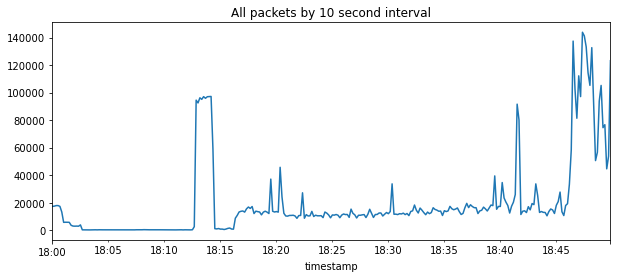

In [11]:
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (10,4)
pyplot.title("All packets by 10 second interval", fontsize=12)
bygroups = df.groupby(pd.Grouper(freq='10s'))
bygroups.size().plot()

In [12]:
print(df.isrc.value_counts().count())
print(df.idst.value_counts().count())

187
2673


There are totally 187 source IPs and 2673 destination IPs in the collected traffic

##### Top 10 senders of traffic ( Source IPs ) in terms of number of packets

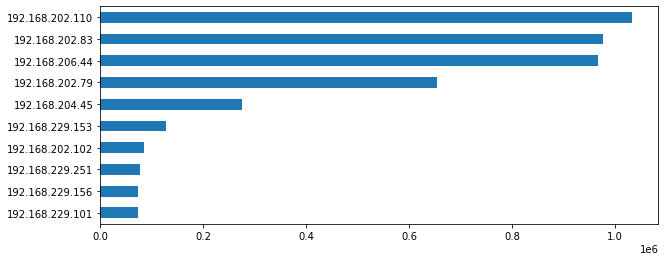

In [13]:
df.isrc.value_counts().head(10).plot(kind='barh').invert_yaxis()

In [14]:
top_src_ip = df.isrc.value_counts().index.tolist()[0]
top_src_ip

'192.168.202.110'

##### Top 10 receivers of traffic ( Destination IPs ) in terms of number of packets

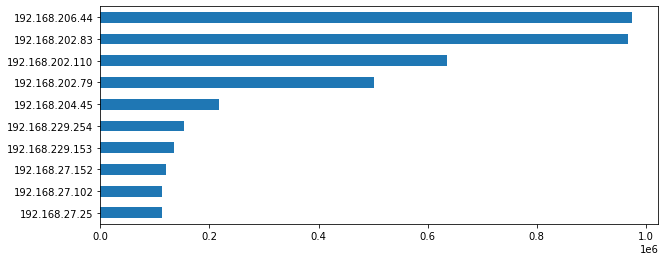

In [15]:
df.idst.value_counts().head(10).plot(kind='barh').invert_yaxis()

In [16]:
top_dst_ip = df.idst.value_counts().index.tolist()[0]
top_dst_ip

'192.168.206.44'

##### Vlans that are part of the traffic and Top Vlans

120    5330626
140     499135
130     120593
150       8814
290       2783
110       2180
270       2170
160       2163
280       2162
180       2162
170       2158
219       2145
220       2145
217       2144
213       2143
216       2143
214       2143
211       2142
212       2142
218       2141
215       2141
Name: vlan, dtype: int64
21


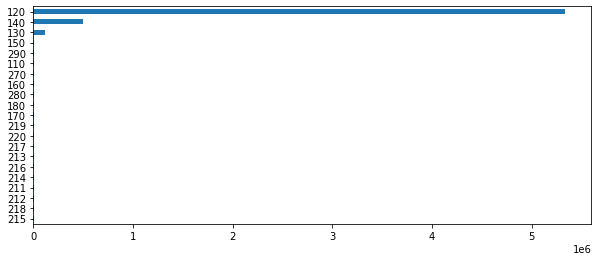

In [17]:
print(df.vlan.value_counts())
print(df.vlan.value_counts().count())
df.vlan.value_counts().plot(kind='barh').invert_yaxis()

Vlans 120, 140 and 130 seem to be the most seen Vlans

##### Top L4 Protocols

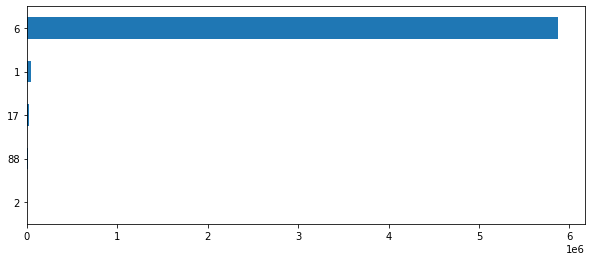

In [18]:
df.iproto.value_counts().plot(kind='barh').invert_yaxis()

6 - TCP 

1 - ICMP

17- UDP

88- Cisco EIGRP

2 - IGMP



##### EIGRP Packets 

224.0.0.10 is the multicast address used by EIGRP as neighbour protocol address. 
Let's see how many routers/sources send out EIGRP packets.

In [19]:
print(df[df.idst=="224.0.0.10"].isrc.value_counts())
print(df[df.idst=="224.0.0.10"].isrc.value_counts().count())

192.168.227.1    650
192.168.220.1    650
192.168.219.1    650
192.168.204.1    649
192.168.217.1    649
192.168.228.1    649
192.168.201.1    649
192.168.216.1    648
192.168.206.1    648
192.168.213.1    648
192.168.214.1    648
192.168.205.1    647
192.168.229.1    647
192.168.212.1    647
192.168.202.1    647
192.168.211.1    647
192.168.218.1    646
192.168.207.1    646
192.168.208.1    646
192.168.215.1    646
192.168.203.1    645
Name: isrc, dtype: int64
21


21 interfaces are active with EIGRP. Does it mean there are 21 routers ? But this seems a large number.
Let us examine the source mac addresses of these interfaces to dig more.

In [20]:
print(df[df.idst=="224.0.0.10"].esrc.value_counts())
print(df[df.idst=="224.0.0.10"].esrc.value_counts().count())

00:16:47:9d:f2:d4    650
00:16:47:9d:f2:d2    650
00:16:47:9d:f2:d3    650
00:16:47:9d:f2:c4    649
00:16:47:9d:f2:d0    649
00:16:47:9d:f2:d5    649
00:16:47:9d:f2:c1    649
00:16:47:9d:f2:c6    648
00:16:47:9d:f2:cf    648
00:16:47:9d:f2:cd    648
00:16:47:9d:f2:cc    648
00:16:47:9d:f2:c5    647
00:16:47:9d:f2:d6    647
00:16:47:9d:f2:cb    647
00:16:47:9d:f2:ca    647
00:16:47:9d:f2:c2    647
00:16:47:9d:f2:ce    646
00:16:47:9d:f2:d1    646
00:16:47:9d:f2:c7    646
00:16:47:9d:f2:c8    646
00:16:47:9d:f2:c3    645
Name: esrc, dtype: int64
21


##### The source mac addresses are sequential and very similar, and so are probably from the same physical device

In [21]:
routers=df[df.idst=="224.0.0.10"][[ 'isrc', 'esrc', 'vlan']]
#routers = routers.drop_duplicates(['isrc', 'esrc']).reset_index()
gr = routers.groupby(['isrc', 'vlan', 'esrc'])
print(gr.size())

isrc           vlan  esrc             
192.168.201.1  110   00:16:47:9d:f2:c1    649
192.168.202.1  120   00:16:47:9d:f2:c2    647
192.168.203.1  130   00:16:47:9d:f2:c3    645
192.168.204.1  140   00:16:47:9d:f2:c4    649
192.168.205.1  150   00:16:47:9d:f2:c5    647
192.168.206.1  160   00:16:47:9d:f2:c6    648
192.168.207.1  170   00:16:47:9d:f2:c7    646
192.168.208.1  180   00:16:47:9d:f2:c8    646
192.168.211.1  211   00:16:47:9d:f2:ca    647
192.168.212.1  212   00:16:47:9d:f2:cb    647
192.168.213.1  213   00:16:47:9d:f2:cc    648
192.168.214.1  214   00:16:47:9d:f2:cd    648
192.168.215.1  215   00:16:47:9d:f2:ce    646
192.168.216.1  216   00:16:47:9d:f2:cf    648
192.168.217.1  217   00:16:47:9d:f2:d0    649
192.168.218.1  218   00:16:47:9d:f2:d1    646
192.168.219.1  219   00:16:47:9d:f2:d2    650
192.168.220.1  220   00:16:47:9d:f2:d3    650
192.168.227.1  270   00:16:47:9d:f2:d4    650
192.168.228.1  280   00:16:47:9d:f2:d5    649
192.168.229.1  290   00:16:47:9d:f2:d6   

##### The above output shows that most of the traffic that we know to be on three VLANs is probably connected ( passing through ) a single device with multiple routed interfaces.

## 2. Hosts Analysis

##### Let us see about the top talker in the network

In [22]:
top_src_ip

'192.168.202.110'

In [23]:
print(df[df.isrc==top_src_ip].idst.value_counts())
print(df[df.isrc==top_src_ip].idst.value_counts().count())

192.168.27.152    117540
192.168.27.102    112962
192.168.27.25     111827
192.168.27.202    106307
192.168.27.1       99315
                   ...  
192.168.28.102         1
192.168.28.152         1
192.168.28.1           1
192.168.28.252         1
192.168.28.203         1
Name: idst, Length: 2042, dtype: int64
2042


 The top talker host 192.168.202.110 has talked to 2042 destination hosts.

In [24]:
df[df.isrc==top_src_ip].iproto.value_counts()

6     1020699
1       10516
17       1041
Name: iproto, dtype: int64

The host mostly uses TCP and has reached 65536 unique destination ports. 

In [25]:
df[df.isrc==top_src_ip].tdport.value_counts().count()

65536

In [26]:
df[df.isrc==top_src_ip].tdport.value_counts()

5432     16336
80        6233
443       5482
445       2782
22        1518
         ...  
43123        8
27326        8
6871         8
37234        8
0            6
Name: tdport, Length: 65536, dtype: int64

Destination Port 5432 corresponds to PostgreSQL and port 80 corresponds to a web server

In [27]:
myan.host_packet_proto_info(df, top_src_ip)


Protocol-wise break-up of packets sent from this host :

192.168.202.110 TCP Packets: 1020699
192.168.202.110 UDP Packets: 1041
192.168.202.110 ICMP Packets: 10516
192.168.202.110 ARP Packets: 0

192.168.202.110 DNS Packets: 543
192.168.202.110 BOOTP Packets: 2


The "top talker" has sent more than 1 million packets most of them TCP ( we saw this previously too)

In [28]:
myan.top_dests_italk_to(df, top_src_ip, 10)


Top Destinations this host talked to:

isrc             idst          
192.168.202.110  192.168.27.152    117540
                 192.168.27.102    112962
                 192.168.27.25     111827
                 192.168.27.202    106307
                 192.168.27.1       99315
                 192.168.27.101     84170
                 192.168.27.103     75842
                 192.168.27.203     67514
                 192.168.27.253     59002
                 192.168.27.100     55318
dtype: int64


In [29]:
myan.host_profile(df, top_src_ip)

Profile of Host 192.168.202.110 : 

Total Number of Packets Sent : 1032256

192.168.202.110 Destinations: 2042
192.168.202.110 TCP Port Sources: 64515
192.168.202.110 TCP Port Destinations: 65536
192.168.202.110 UDP Port Sources: 630
192.168.202.110 UDP Port Destinations: 98


Protocol-wise break-up of packets sent from this host :

192.168.202.110 TCP Packets: 1020699
192.168.202.110 UDP Packets: 1041
192.168.202.110 ICMP Packets: 10516
192.168.202.110 ARP Packets: 0

192.168.202.110 DNS Packets: 543
192.168.202.110 BOOTP Packets: 2


Top Destinations this host talked to:

isrc             idst          
192.168.202.110  192.168.27.152    117540
                 192.168.27.102    112962
                 192.168.27.25     111827
                 192.168.27.202    106307
                 192.168.27.1       99315
                 192.168.27.101     84170
                 192.168.27.103     75842
                 192.168.27.203     67514
                 192.168.27.253     59002
         

As we saw earlier too, the host has talked to 2042 destinations, mostly uses TCP, and has reached 65536 unique TCP destination ports.
65536 also means it covers whole of the available TCP port range (TCP port field is 16 bits).

#### So this host has behaved in an unusual way..Why is this host trying all possible destination TCP port ? We should note this.


In [30]:
myan.port_info(df, top_src_ip)


Port wise breakup of packets :

192.168.202.110 TOP TCP Source Ports -----------------

45799    68423
62078    12595
52544    12592
32881    10755
45800     8968
         ...  
1474         2
23821        2
55124        2
58456        2
10731        1
Name: tsport, Length: 64515, dtype: int64

192.168.202.110 TOP TCP Destination Ports -----------------

5432     16336
80        6233
443       5482
445       2782
22        1518
         ...  
43123        8
27326        8
6871         8
37234        8
0            6
Name: tdport, Length: 65536, dtype: int64

192.168.202.110 TOP UDP Source Ports -----------------

37034    85
62081    61
53       12
43458     7
5060      7
         ..
59930     1
54528     1
58693     1
39255     1
49688     1
Name: utsport, Length: 630, dtype: int64

192.168.202.110 TOP UDP Destination Ports -----------------

53       507
16161     30
69        24
8611      22
137       19
        ... 
3483       1
40795      1
38293      1
1900       1
41524      1


Now, let us examine the another "top talker" 192.168.202.83. 

In [31]:
myan.host_profile(df, "192.168.202.83")

Profile of Host 192.168.202.83 : 

Total Number of Packets Sent : 975908

192.168.202.83 Destinations: 4
192.168.202.83 TCP Port Sources: 28232
192.168.202.83 TCP Port Destinations: 1000
192.168.202.83 UDP Port Sources: 1028
192.168.202.83 UDP Port Destinations: 1


Protocol-wise break-up of packets sent from this host :

192.168.202.83 TCP Packets: 974860
192.168.202.83 UDP Packets: 1044
192.168.202.83 ICMP Packets: 4
192.168.202.83 ARP Packets: 0

192.168.202.83 DNS Packets: 1044
192.168.202.83 BOOTP Packets: 0


Top Destinations this host talked to:

isrc            idst          
192.168.202.83  192.168.206.44    974654
                192.168.207.4       1044
                192.168.201.2        198
                110.209.6.25          12
dtype: int64


Note these parts from above output:

192.168.202.83 Destinations: 4 <br>
192.168.202.83 TCP Port Sources: 28232 <br>
192.168.202.83 TCP Port Destinations: 1000 <br>

The host 192.168.202.83 sends packets to only 4 destinations, but to 1000 TCP ports in total.
1000 destination ports for 4 destination hosts seems a large number.

Also, note that most packets are destined to a single host 192.168.206.44.

Let us look more in to the port wise breakup for this source host.

In [32]:
myan.port_info(df, "192.168.202.83")


Port wise breakup of packets :

192.168.202.83 TOP TCP Source Ports -----------------

41738    111
41737     86
52669     76
60817     65
41735     63
        ... 
36689     17
49112     17
45790     15
49078     15
54214     14
Name: tsport, Length: 28232, dtype: int64

192.168.202.83 TOP TCP Destination Ports -----------------

80       6000
111      2895
53       2895
443      1930
666       965
         ... 
1111      965
2119      965
7676      965
544       965
20828     965
Name: tdport, Length: 1000, dtype: int64

192.168.202.83 TOP UDP Source Ports -----------------

33738    3
43052    2
54328    2
44666    2
51959    2
        ..
47424    1
42881    1
57041    1
48671    1
54037    1
Name: utsport, Length: 1028, dtype: int64

192.168.202.83 TOP UDP Destination Ports -----------------

53    1044
Name: utdport, dtype: int64


If you see "TOP TCP Destination Ports" output above, we can see a lot of destination ports being sent the same number of packets -965.  This seems interesting. Let us see how many ports in total have received this 965 number of packets.

In [33]:
print(df[(df.isrc=="192.168.202.83")].tdport.value_counts()[df[(df.isrc=="192.168.202.83")].tdport.value_counts() == 965])

666      965
5802     965
417      965
6004     965
5061     965
        ... 
1111     965
2119     965
7676     965
544      965
20828    965
Name: tdport, Length: 996, dtype: int64


So 996 ports out of 1000 TCP destination ports have received the same number of 965 packets from 192.168.202.83.
Since we saw that 192.168.202.83 has sent most of the packets to a single host 192.168.206.44, let us check if these 996 destination ports belong to 192.168.206.44.

In [34]:
myan.port_info(df, "192.168.202.83", "192.168.206.44")


Port wise breakup of packets :

192.168.202.83 to 192.168.206.44 TOP TCP Source Ports -----------------

52669    76
60817    65
59344    61
35166    61
33600    60
         ..
54197    17
49112    17
45790    15
49078    15
54214    14
Name: tsport, Length: 28232, dtype: int64

192.168.202.83 to 192.168.206.44 TOP TCP Destination Ports -----------------

80       5790
111      2895
53       2895
443      1930
666       965
         ... 
1111      965
2119      965
7676      965
544       965
20828     965
Name: tdport, Length: 1000, dtype: int64

192.168.202.83 to 192.168.206.44 TOP UDP Source Ports -----------------

Series([], Name: utsport, dtype: int64)

192.168.202.83 to 192.168.206.44 TOP UDP Destination Ports -----------------

Series([], Name: utdport, dtype: int64)


In [35]:
print(df[(df.isrc=="192.168.202.83") & (df.idst=="192.168.206.44")].tdport.value_counts()[df[(df.isrc=="192.168.202.83") & (df.idst=="192.168.206.44")].tdport.value_counts() == 965])

666      965
5802     965
417      965
6004     965
5061     965
        ... 
1111     965
2119     965
7676     965
544      965
20828    965
Name: tdport, Length: 996, dtype: int64


We can see that host 192.168.202.83 is sending packets to 1000 TCP ports of a single destination 192.168.206.44.
And it is sending same number of packets to 996 ports out of these 1000.

Let us look at the destination 192.168.206.44 

In [36]:
myan.host_profile(df, "192.168.206.44")

Profile of Host 192.168.206.44 : 

Total Number of Packets Sent : 966934

192.168.206.44 Destinations: 1
192.168.206.44 TCP Port Sources: 1000
192.168.206.44 TCP Port Destinations: 28232
192.168.206.44 UDP Port Sources: 0
192.168.206.44 UDP Port Destinations: 0


Protocol-wise break-up of packets sent from this host :

192.168.206.44 TCP Packets: 966930
192.168.206.44 UDP Packets: 0
192.168.206.44 ICMP Packets: 4
192.168.206.44 ARP Packets: 0

192.168.206.44 DNS Packets: 0
192.168.206.44 BOOTP Packets: 0


Top Destinations this host talked to:

isrc            idst          
192.168.206.44  192.168.202.83    966934
dtype: int64


#### Is the host 192.168.202.83 targeting or scanning 192.168.206.44 ? We should note this - #Note-1

In [37]:
notes = []
notes.append("Note-1 : Is the host 192.168.202.83 targeting or scanning 192.168.206.44 ? \n")

# Let us maintain a scan list to keep track of potential scanners we find on the way.
scanlist = ['192.168.202.83']
scanlist

['192.168.202.83']

## 3. Analysis of Common Network Services 
#### Find which hosts provide these services in the network


20 - FTP Data <br>
21 - FTP Control <br>
22 - SSH <br>
23 - Telnet <br>
25 - SMTP <br>
53 - DNS <br>
67 - BOOTP Server <br>
68 - BOOTP Client <br>
69 - TFTP <br>
80 - HTTP <br>
123 - NTP <br>
137 - NetBIOS Name Service <br>
161 - SNMP <br>
427 - SLP <br>
443 - HTTPS <br>
514 - Remote Shell <br>
554 - RTSP <br>
1900 - SSDP
3128 - Squid Web Proxy
3306 - MySQL
3702 - WSD
4444 - CrackDown
5357 - WSDAPI
5432 - PostgreSQL 
8000 - HTTP
8080 - HTTP
8089 - Splunk admin


In [39]:

interesting_ports=['20','21','22','23','25','53','67','68','69',\
                   '80','123','137','161','427','443','514','554',\
                   '1900','3128','3306','3702','4444','5357',\
                   '5432','8000','8080','8089']

for port in interesting_ports:
    print()
    print("Top 5 TCP active on port: " + port)
    print(df[df.tsport==port].isrc.value_counts().head(5))
    print()
    print("Top 5 UDP active on port: " + port)
    print(df[df.utsport==port].isrc.value_counts().head(5))
    
    
    


Top 5 TCP active on port: 20
192.168.206.44     965
192.168.202.110    245
192.168.21.100       6
192.168.21.25        5
192.168.21.101       5
Name: isrc, dtype: int64

Top 5 UDP active on port: 20
Series([], Name: isrc, dtype: int64)

Top 5 TCP active on port: 21
192.168.206.44    965
192.168.21.152    106
192.168.27.101     97
192.168.28.152     82
192.168.26.101     74
Name: isrc, dtype: int64

Top 5 UDP active on port: 21
Series([], Name: isrc, dtype: int64)

Top 5 TCP active on port: 22
192.168.21.254    1887
192.168.206.44     965
192.168.24.254     792
192.168.22.254     745
192.168.23.254     414
Name: isrc, dtype: int64

Top 5 UDP active on port: 22
Series([], Name: isrc, dtype: int64)

Top 5 TCP active on port: 23
192.168.206.44    965
192.168.21.100     17
192.168.27.25       9
192.168.27.1        8
192.168.21.1        7
Name: isrc, dtype: int64

Top 5 UDP active on port: 23
Series([], Name: isrc, dtype: int64)

Top 5 TCP active on port: 25
192.168.206.44     965
192.168.2

#### It's a lengthy output above, but we can learn the important servers in the network.

For example, we observe an interesting thing. Of the top TCP servers on port 22 and 443, there are many hosts ending with IP *.*.*.254 ( ending with 254 ). 
Looks like these hosts are VMware servers using ports 22 and 443.  
##### We should note this - #Note-2

Before that, we will examine these hosts as to whom they talk to more.

In [40]:
hosts_254 = df[df.isrc.fillna('0').str.endswith('254')].isrc
hosts_254 = hosts_254.unique()
hosts_254

array(['192.168.229.254', '192.168.28.254', '192.168.1.254',
       '192.168.23.254', '192.168.26.254', '192.168.22.254',
       '192.168.21.254', '192.168.24.254', '192.168.27.254',
       '192.168.25.254'], dtype=object)

In [41]:
for host in hosts_254:
    myan.top_dests_italk_to(df, host)


Top Destinations this host talked to:

isrc             idst           
192.168.229.254  192.168.202.79     20642
                 192.168.202.101        6
dtype: int64

Top Destinations this host talked to:

isrc            idst           
192.168.28.254  192.168.202.76     8637
                192.168.202.96      664
                192.168.202.109     282
                192.168.204.45      220
                192.168.202.68       15
                192.168.202.101       6
                192.168.202.102       3
                192.168.202.110       1
dtype: int64

Top Destinations this host talked to:

isrc           idst           
192.168.1.254  239.255.255.250    408
dtype: int64

Top Destinations this host talked to:

isrc            idst           
192.168.23.254  192.168.202.76     6421
                192.168.202.109     358
                192.168.204.45      224
                192.168.202.68       15
                192.168.202.110      13
                192.168.202.102

We can see that 192.168.202.76 is the host which has mostly talked to servers with address ending with .254.
Let us add this host to the potential scanners list.

In [42]:
scanlist.append('192.168.202.76')
scanlist

['192.168.202.83', '192.168.202.76']

In [43]:
notes.append("Note-2 : Hosts ending with .254 look like VMware servers using port 22 and 443. \
192.168.202.76 appears to be a scanner targeting these hosts \n")

## 4. Clustering Of Hosts based on Ports usage (using K-Means Clustering technique)

We will try to cluster the hosts based on the TCP ports they use as source and destinations.

Most common servers operate on lower port numbers, from port range 0 to 65,536. So, hosts that source traffic from lower port numbers are potential servers. 

In [44]:

### Create a new df consisting of src ip, dest ip, tcp ports and udp ports info

dfports=df[['isrc','idst','tsport','tdport','utsport','utdport']]\
.fillna("0").copy()
dfports['tsport']=dfports['tsport'].astype(int)
dfports['tdport']=dfports['tdport'].astype(int)
dfports['utsport']=dfports['utsport'].astype(int)
dfports['utdport']=dfports['utdport'].astype(int)

## We get the destination and source port of the packet - this could be only one of the two -TCP or UDP, not both.
dfports['d']=dfports['tdport']+dfports['utdport']
dfports['s']=dfports['tsport']+dfports['utsport']

## Drop the original port details, as we have extracted the ports regardless of TCP or UDP for each packet.
dfports=dfports.drop(['tsport','tdport','utsport','utdport'],axis=1)

In [45]:
dfports

,isrc,idst,d,s
timestamp,,,,
2012-03-16 18:00:00.000,192.168.229.254,192.168.202.79,46117,443
2012-03-16 18:00:00.000,192.168.202.79,192.168.229.254,443,46117
2012-03-16 18:00:00.000,192.168.202.79,192.168.229.251,80,50463
2012-03-16 18:00:00.000,192.168.229.254,192.168.202.79,46117,443
2012-03-16 18:00:00.000,192.168.202.79,192.168.229.251,80,50465
...,...,...,...,...
2012-03-16 18:49:57.250,192.168.202.110,192.168.27.253,41508,13697
2012-03-16 18:49:57.250,192.168.27.253,192.168.202.110,62752,41296
2012-03-16 18:49:57.250,192.168.27.253,192.168.202.110,47809,41349


In [46]:
dfports.shape

(5998837, 4)

In [47]:
len(dfports.isrc.unique())

188

Let us identify hosts which send significantly less number of packets and drop these from the analysis

In [48]:
countframe = dfports.groupby('isrc').size().reset_index(name='counts')
print(countframe)
print()
print(countframe.counts.describe())

               isrc  counts
0                 0   37597
1           0.0.0.0      84
2       172.19.2.66       7
3     192.168.1.254     408
4      192.168.11.1       1
..              ...     ...
183  192.168.28.203    2998
184   192.168.28.25    2767
185  192.168.28.252    2732
186  192.168.28.253    3245
187  192.168.28.254    9828

[188 rows x 2 columns]

count    1.880000e+02
mean     3.190871e+04
std      1.344722e+05
min      1.000000e+00
25%      6.195000e+02
50%      1.377000e+03
75%      7.525000e+03
max      1.032256e+06
Name: counts, dtype: float64


In [49]:
cutoff=500
#countframe = dfports.groupby('isrc').size().reset_index(name='counts')
droplist=list(countframe[countframe.counts < cutoff].isrc.unique())
print(droplist)
len(droplist)

['0.0.0.0', '172.19.2.66', '192.168.1.254', '192.168.11.1', '192.168.169.129', '192.168.202.106', '192.168.202.107', '192.168.202.108', '192.168.202.112', '192.168.202.113', '192.168.202.115', '192.168.202.116', '192.168.202.57', '192.168.202.65', '192.168.202.71', '192.168.202.74', '192.168.202.75', '192.168.202.80', '192.168.202.82', '192.168.202.84', '192.168.202.85', '192.168.202.86', '192.168.202.87', '192.168.202.88', '192.168.202.92', '192.168.202.95', '192.168.204.57', '192.168.204.59', '192.168.204.60', '192.168.204.69', '192.168.208.18', '192.168.227.83', '192.168.23.252', '192.168.25.100', '192.168.25.101', '192.168.25.102', '192.168.25.103', '192.168.25.152', '192.168.25.202', '192.168.25.203', '192.168.25.25', '192.168.25.252', '192.168.25.254', '192.168.27.252']


44

Create a new data frame containing each
Host IP, Median of the source ports it uses, Median of the destination ports it uses.

We could even take mean of the ports, but I chose median because the ports might not be a uniformly distributed values in the range.

In [50]:
#droplist.append('0.0.0.0')
droplist.append('0')

#d = dfports.groupby('isrc')['d'].mean().to_frame()
#s = dfports.groupby('isrc')['s'].mean().to_frame()
d = dfports.groupby('isrc')['d'].median().to_frame()
s = dfports.groupby('isrc')['s'].median().to_frame()
#d
sd = d.merge(s, how='outer', left_index=True, right_index=True).reset_index()
sd = sd[~sd.isrc.isin(droplist)]
sd[:2]

,isrc,d,s
6,192.168.201.1,0.0,0.0
7,192.168.201.2,33348.0,80.0


In [51]:
sd.shape

(143, 3)

Let us do a scatter plot of the hosts between their avg source port (X-axis) and avg dest port (Y-axis).

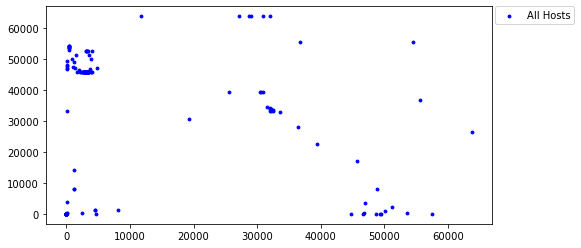

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,4)
plt.scatter(sd['s'], sd['d'], s=8, color='blue',label="All Hosts")
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
plt.show()

##### We can see some 5 or 6 clusters of hosts in the above plot. Let us try K-means clustering to help with grouping.

First we have to find out the optimum number of clusters by using the "Elbow" method and K-Means clustering.

In [54]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

std=np.array(sd[['s','d']])

tightness = []
possibleKs = range(1,10)

for k in possibleKs:
    km = KMeans(n_clusters=k).fit(std)
    km.fit(std)
    tightness.append(sum(np.min(cdist(std, \
      km.cluster_centers_, 'euclidean'), axis=1)) / std.shape[0])

C:\Users\rajar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rajar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


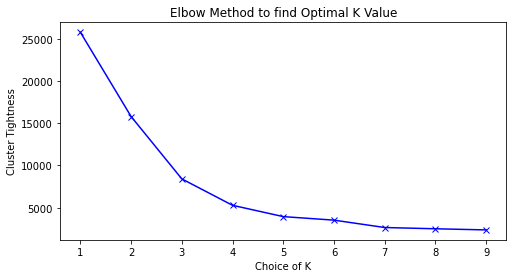

In [55]:
plt.plot(possibleKs, tightness, 'bx-')
plt.xlabel('Choice of K')
plt.ylabel('Cluster Tightness')
plt.title('Elbow Method to find Optimal K Value')
plt.show()

In [56]:
list(zip(possibleKs,tightness))

[(1, 25767.018985816194),
 (2, 15794.53852780683),
 (3, 8413.579539817332),
 (4, 5287.531583303124),
 (5, 3949.996423008617),
 (6, 3532.054827825882),
 (7, 2659.982132064013),
 (8, 2511.2918450495868),
 (9, 2376.308492613217)]

Possible elbows seem to be at K=5 and K=6. Let us choose 6.

In [57]:
kmeans = KMeans(n_clusters=6, random_state=99).fit(std)
labels = kmeans.labels_
sd['kcluster'] = labels
#sd

print(sd.groupby(['kcluster']).mean())

                     d             s
kcluster                            
0          2539.461538  49197.884615
1         47617.986111   2458.263889
2          1240.516129    898.935484
3         33819.529412  31487.941176
4         62626.285714  28031.000000
5         39562.333333  57939.000000


##### Note :
    Cluster 0 has low average destination port and high average source port - Could be hosts which are clients.
    Cluster 1 has high average destination port and low average source port - Could be hosts which are servers.



In [58]:
kdf0=sd[sd.kcluster==0]
kdf1=sd[sd.kcluster==1]
kdf2=sd[sd.kcluster==2]
kdf3=sd[sd.kcluster==3]
kdf4=sd[sd.kcluster==4]
kdf5=sd[sd.kcluster==5]
sd.kcluster.value_counts()

1    72
2    31
3    17
0    13
4     7
5     3
Name: kcluster, dtype: int64

Let us plot the clusters found 

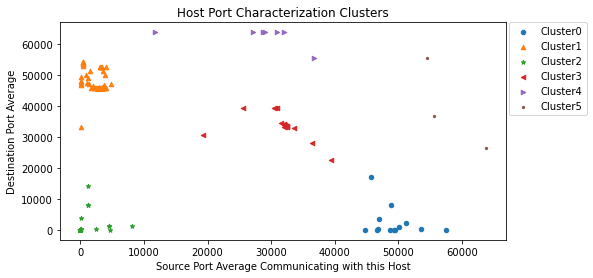

In [59]:
plt.scatter(kdf0['s'],kdf0['d'],s=20,label="Cluster0")
plt.scatter(kdf1['s'],kdf1['d'],s=20,marker="^",label="Cluster1")
plt.scatter(kdf2['s'],kdf2['d'],s=20,marker="*",label="Cluster2")
plt.scatter(kdf3['s'],kdf3['d'],s=20,marker="<",label="Cluster3")
plt.scatter(kdf4['s'],kdf4['d'],s=20,marker=">",label="Cluster4")
plt.scatter(kdf5['s'],kdf5['d'],s=20,marker=".",label="Cluster5")
#plt.scatter(kdfc['s'],kdfc['d'],s=50,marker="x",color='black', label="Scan")
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
plt.title("Host Port Characterization Clusters", fontsize=12)
plt.xlabel("Source Port Average Communicating with this Host")
plt.ylabel("Destination Port Average")
plt.show()

Interesting clusters are cluster 0 at the lower-right (potential clients) and cluster 1 at the upper-left (potential servers).

In [60]:
possible_clients = list(kdf0.isrc)
possible_servers = list(kdf1.isrc)

#### Let us examine around 20 of the potential servers from cluster 1.

In [61]:
checked = list(kdf1.isrc[0:20])

for checkme in checked:
    print("\n-------------------------------------------------------\n")
    myan.host_profile(df,checkme)
    myan.port_info(df,checkme)


-------------------------------------------------------

Profile of Host 192.168.201.2 : 

Total Number of Packets Sent : 540

192.168.201.2 Destinations: 3
192.168.201.2 TCP Port Sources: 2
192.168.201.2 TCP Port Destinations: 22
192.168.201.2 UDP Port Sources: 0
192.168.201.2 UDP Port Destinations: 0


Protocol-wise break-up of packets sent from this host :

192.168.201.2 TCP Packets: 540
192.168.201.2 UDP Packets: 0
192.168.201.2 ICMP Packets: 0
192.168.201.2 ARP Packets: 0

192.168.201.2 DNS Packets: 0
192.168.201.2 BOOTP Packets: 0


Top Destinations this host talked to:

isrc           idst          
192.168.201.2  192.168.202.83    216
               192.168.202.65    195
               192.168.202.87    129
dtype: int64

Port wise breakup of packets :

192.168.201.2 TOP TCP Source Ports -----------------

80     345
443    195
Name: tsport, dtype: int64

192.168.201.2 TOP TCP Destination Ports -----------------

41738    91
1062     74
33348    56
41737    54
41735    33
1064 

192.168.21.102 TCP Port Destinations: 1077
192.168.21.102 UDP Port Sources: 2
192.168.21.102 UDP Port Destinations: 8


Protocol-wise break-up of packets sent from this host :

192.168.21.102 TCP Packets: 4623
192.168.21.102 UDP Packets: 16
192.168.21.102 ICMP Packets: 35
192.168.21.102 ARP Packets: 0

192.168.21.102 DNS Packets: 15
192.168.21.102 BOOTP Packets: 0


Top Destinations this host talked to:

isrc            idst           
192.168.21.102  192.168.202.110    3130
                192.168.203.45     1170
                192.168.202.102     233
                192.168.204.45      105
                192.168.202.73       36
dtype: int64

Port wise breakup of packets :

192.168.21.102 TOP TCP Source Ports -----------------

445      105
22        85
80        64
3128      52
139       40
        ... 
10203      1
1315       1
998        1
37452      1
19810      1
Name: tsport, Length: 1077, dtype: int64

192.168.21.102 TOP TCP Destination Ports -----------------

52544    1000


192.168.21.252 Destinations: 5
192.168.21.252 TCP Port Sources: 1075
192.168.21.252 TCP Port Destinations: 1060
192.168.21.252 UDP Port Sources: 0
192.168.21.252 UDP Port Destinations: 0


Protocol-wise break-up of packets sent from this host :

192.168.21.252 TCP Packets: 4428
192.168.21.252 UDP Packets: 0
192.168.21.252 ICMP Packets: 14
192.168.21.252 ARP Packets: 0

192.168.21.252 DNS Packets: 0
192.168.21.252 BOOTP Packets: 0


Top Destinations this host talked to:

isrc            idst           
192.168.21.252  192.168.202.110    3109
                192.168.203.45     1096
                192.168.202.102     182
                192.168.204.45       53
                192.168.202.73        2
dtype: int64

Port wise breakup of packets :

192.168.21.252 TOP TCP Source Ports -----------------

80       211
445        8
139        7
515        6
1          6
        ... 
10203      1
1478       1
2194       1
57772      1
6503       1
Name: tsport, Length: 1075, dtype: int64

192.168

192.168.22.101 UDP Packets: 0
192.168.22.101 ICMP Packets: 14
192.168.22.101 ARP Packets: 0

192.168.22.101 DNS Packets: 3
192.168.22.101 BOOTP Packets: 0


Top Destinations this host talked to:

isrc            idst           
192.168.22.101  192.168.202.110    1001
                192.168.202.102     107
                192.168.204.45       71
                192.168.202.73        2
dtype: int64

Port wise breakup of packets :

192.168.22.101 TOP TCP Source Ports -----------------

21       45
80        7
22        7
445       5
139       4
         ..
1077      1
5901      1
57797     1
4006      1
1051      1
Name: tsport, Length: 1009, dtype: int64

192.168.22.101 TOP TCP Destination Ports -----------------

45799    1000
47325      64
40259      36
56783      12
4860        9
4557        9
4733        8
4985        8
4100        4
47326       2
58396       1
12347       1
21001       1
38097       1
12345       1
46875       1
12358       1
12346       1
12349       1
12350      

If we look at the data of "TOP TCP Source Ports" of the 20 hosts, we see that in many hosts(possible servers) there are at least 1000 source (server) ports with some packet count.

For example:

192.168.22.103 TCP Port Sources: 1072

192.168.22.103 TOP TCP Source Ports -----------------

443      449
28815    191
445       77
139       27
80        18
        ... 
6          1
254        1
3878       1
3001       1
1443       1
Name: tsport, Length: 1072, dtype: int64


Are these servers being targeted and scanned by some other hosts which send packets to all these ports (scanning) of these servers ?

In [62]:
#### Let us check the servers which have at least 1000 source ports with packets for them.

check_servers = []

for checkme in possible_servers:
    
    print(checkme + " TCP Source Ports : " + str(df[df.isrc==checkme].tsport.value_counts().count()))
    
    if df[df.isrc==checkme].tsport.value_counts().count() >= 1000:
        check_servers.append(checkme)

print()
print(check_servers)
print(len(check_servers))        


192.168.201.2 TCP Source Ports : 2
192.168.202.78 TCP Source Ports : 1
192.168.205.253 TCP Source Ports : 2
192.168.206.44 TCP Source Ports : 1000
192.168.207.4 TCP Source Ports : 0
192.168.21.102 TCP Source Ports : 1077
192.168.21.103 TCP Source Ports : 1076
192.168.21.152 TCP Source Ports : 1072
192.168.21.202 TCP Source Ports : 1077
192.168.21.203 TCP Source Ports : 1077
192.168.21.252 TCP Source Ports : 1075
192.168.21.253 TCP Source Ports : 1011
192.168.21.254 TCP Source Ports : 2
192.168.22.1 TCP Source Ports : 1075
192.168.22.100 TCP Source Ports : 1074
192.168.22.101 TCP Source Ports : 1009
192.168.22.102 TCP Source Ports : 1075
192.168.22.103 TCP Source Ports : 1072
192.168.22.152 TCP Source Ports : 1073
192.168.22.202 TCP Source Ports : 1075
192.168.22.25 TCP Source Ports : 1071
192.168.22.252 TCP Source Ports : 1075
192.168.22.253 TCP Source Ports : 1011
192.168.22.254 TCP Source Ports : 2
192.168.229.254 TCP Source Ports : 2
192.168.23.1 TCP Source Ports : 1075
192.168.23.1

In [63]:
print(len(check_servers))

60


There are 60 servers which can be checked if they were targets of scanning. We will pick only first 20 of these for further examination. We will check which are the other hosts which were talking to each of these 20 servers.

In [64]:
servers_may_be_scanned = ['192.168.206.44', '192.168.21.102','192.168.21.103', 
                          '192.168.21.152','192.168.21.202', '192.168.21.203', 
                          '192.168.21.252','192.168.21.253', '192.168.22.1', 
                          '192.168.22.100', '192.168.22.101', '192.168.22.102', 
                          '192.168.22.103', '192.168.22.152', '192.168.22.202', 
                          '192.168.22.25', '192.168.22.252', '192.168.22.253', 
                          '192.168.23.1', '192.168.23.100']

for i in servers_may_be_scanned:
    myan.top_dests_italk_to(df, i, head=10)


Top Destinations this host talked to:

isrc            idst          
192.168.206.44  192.168.202.83    966934
dtype: int64

Top Destinations this host talked to:

isrc            idst           
192.168.21.102  192.168.202.110    3130
                192.168.203.45     1170
                192.168.202.102     233
                192.168.204.45      105
                192.168.202.73       36
dtype: int64

Top Destinations this host talked to:

isrc            idst           
192.168.21.103  192.168.202.110    4123
                192.168.203.45     1713
                192.168.202.81      362
                192.168.202.102     217
                192.168.204.45      105
                192.168.202.73       30
                192.168.202.94        9
dtype: int64

Top Destinations this host talked to:

isrc            idst           
192.168.21.152  192.168.202.110    3578
                192.168.203.45     1460
                192.168.202.81      361
                192.168.202.102  

Examining the above output, the following are the hosts which appear frequently in most of the 20 servers' conversation list.

'192.168.202.110', '192.168.203.45', '192.168.204.45', '192.168.202.102', '192.168.202.73', '192.168.202.81'

##### These might some of the popular scanners in the network.



In [65]:
scanlist = scanlist + ['192.168.202.110', '192.168.203.45', '192.168.204.45', '192.168.202.102',
                        '192.168.202.73','192.168.202.81']

print(scanlist)
                       
kdfc=sd[sd.isrc.isin(scanlist)]

['192.168.202.83', '192.168.202.76', '192.168.202.110', '192.168.203.45', '192.168.204.45', '192.168.202.102', '192.168.202.73', '192.168.202.81']


Let us plot again the clusters, but this time along with the scanner hosts

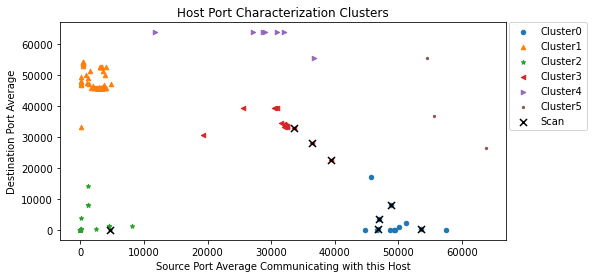

In [66]:
plt.scatter(kdf0['s'],kdf0['d'],s=20,label="Cluster0")
plt.scatter(kdf1['s'],kdf1['d'],s=20,marker="^",label="Cluster1")
plt.scatter(kdf2['s'],kdf2['d'],s=20,marker="*",label="Cluster2")
plt.scatter(kdf3['s'],kdf3['d'],s=20,marker="<",label="Cluster3")
plt.scatter(kdf4['s'],kdf4['d'],s=20,marker=">",label="Cluster4")
plt.scatter(kdf5['s'],kdf5['d'],s=20,marker=".",label="Cluster5")
plt.scatter(kdfc['s'],kdfc['d'],s=50,marker="x",color='black', label="Scan")

plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
plt.title("Host Port Characterization Clusters", fontsize=12)
plt.xlabel("Source Port Average Communicating with this Host")
plt.ylabel("Destination Port Average")
plt.show()


In the plot above, we can see that

1. Few of the scanners fall in the cluster 0 which we consider as possible client hosts. This is expected as scanners are commonly client hosts which use high source ports and they scan the server ports ( low destination ports ).

2. Few of the scanners are also seen falling in the cluster 3 whose source port and avg destination port are middle range values. This might be because - some hosts may try to hide scanning activity by equally scanning all destination ports, including the high ones.


In [68]:
notes.append('Potential Scanners List : ' + str(scanlist) + '\n')

In [69]:
notes.append('Possible Servers List : ' + str(possible_servers) + '\n')
notes.append('Possible Clients List : ' + str(possible_clients) + '\n')

In [71]:
notes

['Note-1 : Is the host 192.168.202.83 targeting or scanning 192.168.206.44 ? \n',
 'Note-2 : Hosts ending with .254 look like VMware servers using port 22 and 443. 192.168.202.76 appears to be a scanner targeting these hosts \n',
 "Potential Scanners List : ['192.168.202.83', '192.168.202.76', '192.168.202.110', '192.168.203.45', '192.168.204.45', '192.168.202.102', '192.168.202.73', '192.168.202.81']\n",
 "Possible Servers List : ['192.168.201.2', '192.168.202.78', '192.168.205.253', '192.168.206.44', '192.168.207.4', '192.168.21.102', '192.168.21.103', '192.168.21.152', '192.168.21.202', '192.168.21.203', '192.168.21.252', '192.168.21.253', '192.168.21.254', '192.168.22.1', '192.168.22.100', '192.168.22.101', '192.168.22.102', '192.168.22.103', '192.168.22.152', '192.168.22.202', '192.168.22.25', '192.168.22.252', '192.168.22.253', '192.168.22.254', '192.168.229.254', '192.168.23.1', '192.168.23.100', '192.168.23.101', '192.168.23.102', '192.168.23.103', '192.168.23.152', '192.168.23

In [72]:
file = open("Observations.txt","w")
file.writelines(notes)
file.close()